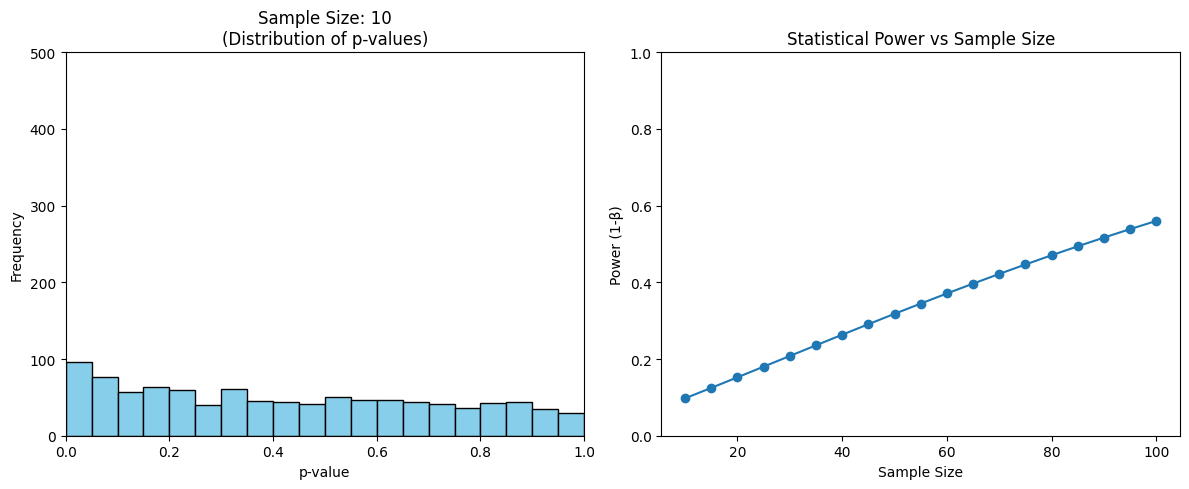

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.power import TTestIndPower
from matplotlib.animation import FuncAnimation

# Use a font that supports English characters
plt.rcParams['font.family'] = 'sans-serif'

# Fix the random seed for reproducibility
np.random.seed(42)

# Simulation parameters
effect_size = 0.3      # small effect size (small difference in means)
n_experiments = 1000   # number of experiments per sample size
sample_sizes = np.arange(10, 101, 5)  # sample sizes from 10 to 100 in steps of 5

# Dictionary to store p-values for each sample size
pvals_dict = {}

# Simulate p-values for each sample size
for n in sample_sizes:
    pvals = []
    for _ in range(n_experiments):
        # Group 1: mean 0, Group 2: mean = effect_size (small difference)
        group1 = np.random.normal(0, 1, n)
        group2 = np.random.normal(effect_size, 1, n)
        t_stat, p_val = stats.ttest_ind(group1, group2)
        pvals.append(p_val)
    pvals_dict[n] = np.array(pvals)

# Calculate statistical power using statsmodels
analysis = TTestIndPower()
alpha = 0.05  # significance level
power_values = [analysis.power(effect_size=effect_size, nobs1=n, alpha=alpha, ratio=1.0, alternative='two-sided') 
                for n in sample_sizes]

# Set up the figure and axes for the animation and power curve
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Set up the histogram for the p-value distribution (initial empty plot)
ax[0].hist([], bins=np.linspace(0, 1, 21), edgecolor='black')
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, n_experiments/2)
ax[0].set_title("Distribution of p-values")
ax[0].set_xlabel("p-value")
ax[0].set_ylabel("Frequency")

# Plot the power curve on the second axis
ax[1].plot(sample_sizes, power_values, marker='o')
ax[1].set_title("Statistical Power vs Sample Size")
ax[1].set_xlabel("Sample Size")
ax[1].set_ylabel("Power (1-β)")
ax[1].set_ylim(0, 1)

# Update function for the animation (updates the histogram)
def update(frame):
    n = sample_sizes[frame]
    pvals = pvals_dict[n]
    ax[0].cla()  # clear the axis for new plot
    ax[0].hist(pvals, bins=np.linspace(0, 1, 21), edgecolor='black', color='skyblue')
    ax[0].set_xlim(0, 1)
    ax[0].set_ylim(0, n_experiments/2)
    ax[0].set_title(f"Sample Size: {n}\n(Distribution of p-values)")
    ax[0].set_xlabel("p-value")
    ax[0].set_ylabel("Frequency")
    return ax[0].patches

# Create the animation and assign it to a persistent variable
anim = FuncAnimation(fig, update, frames=len(sample_sizes), interval=800, blit=False, repeat=True)

# Call update once to initialize the left graph
update(0)

plt.tight_layout()
plt.show()


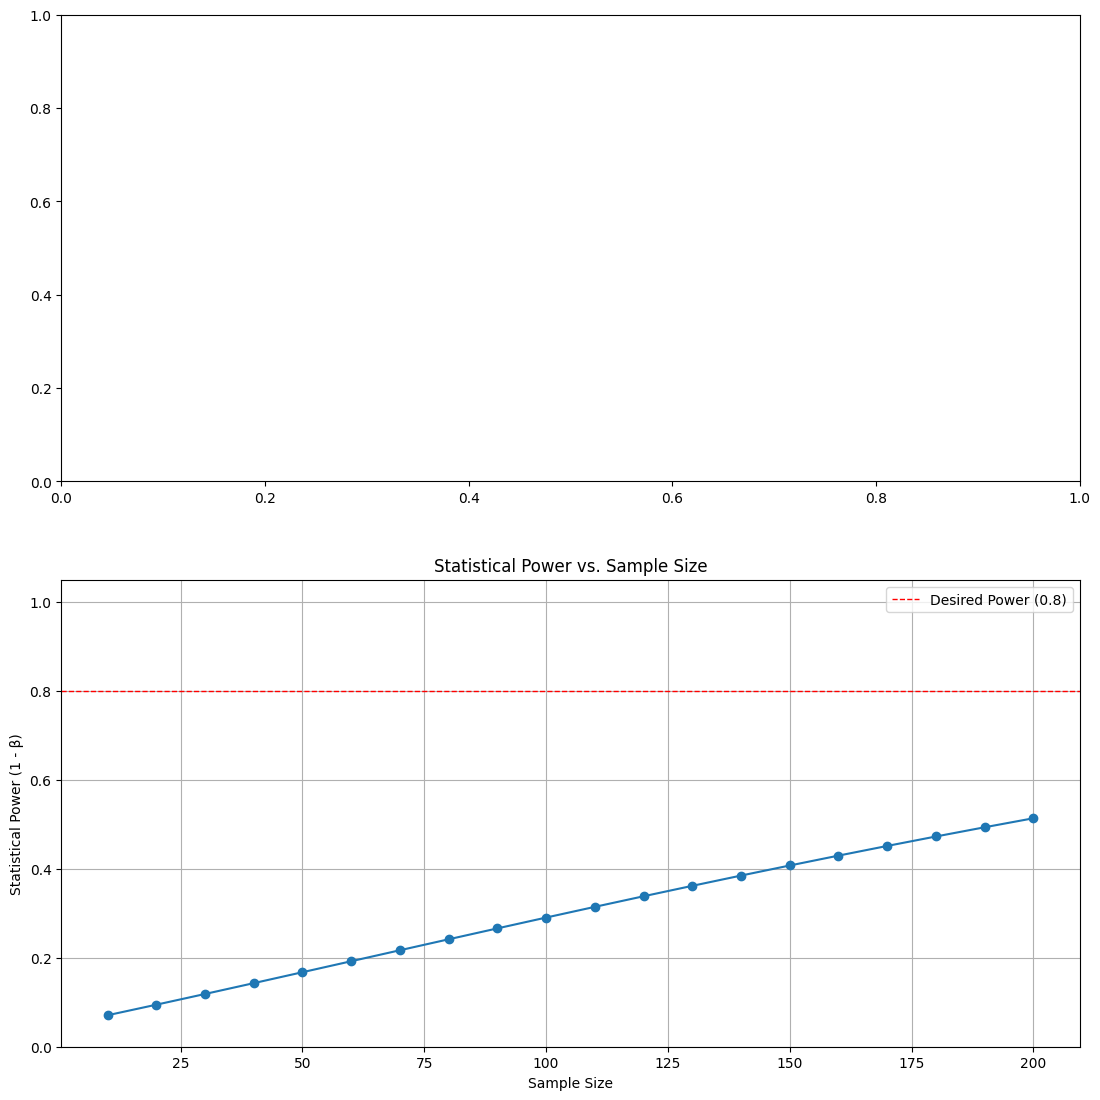

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.power as power
import matplotlib.animation as animation
import warnings
warnings.filterwarnings("ignore") # 警告を無視

# パラメータ
mean1 = 0
mean2 = 0.2  # わずかな差
sd = 1
alpha = 0.05  # 有意水準

# サンプルサイズ範囲
sample_sizes = np.arange(10, 201, 10)  # 10から200まで10刻み

# シミュレーション回数
num_simulations = 1000

# データ生成関数
def generate_data(sample_size):
    group1 = np.random.normal(mean1, sd, sample_size)
    group2 = np.random.normal(mean2, sd, sample_size)
    return group1, group2

# アニメーション関数
def animate(i):
    sample_size = sample_sizes[i]
    p_values = []

    for _ in range(num_simulations):
        group1, group2 = generate_data(sample_size)
        t_statistic, p_value = stats.ttest_ind(group1, group2)
        p_values.append(p_value)

    # ヒストグラムをクリア
    ax1.cla()

    # ヒストグラムの描画
    ax1.hist(p_values, bins=20, density=True, alpha=0.7, color='skyblue')
    ax1.set_xlabel("P-value")
    ax1.set_ylabel("Frequency")
    ax1.set_title(f"Sample Size = {sample_size}, P-value Distribution")
    ax1.axvline(alpha, color='red', linestyle='dashed', linewidth=1, label='Significance Level (α)')
    ax1.legend()

    # 検出力を計算
    reject_count = sum(p < alpha for p in p_values)
    power_estimate = reject_count / num_simulations

    ax1.text(0.7, 0.8, f"Estimated Power: {power_estimate:.2f}", transform=ax1.transAxes)

    return ax1,

# 検出力を計算するための関数
def calculate_power(sample_size, effect_size=0.2, alpha=0.05):
    analysis = power.TTestIndPower()
    power_value = analysis.power(effect_size, nobs1=sample_size, alpha=alpha, ratio=1)
    return power_value

# 検出力を計算
power_values = [calculate_power(size) for size in sample_sizes]

# FigureとAxesの作成
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
fig.tight_layout(pad=5.0) # レイアウト調整

# アニメーションの作成
ani = animation.FuncAnimation(fig, animate, frames=len(sample_sizes), repeat=False)

# 検出力 vs 標本サイズのグラフを描画
ax2.plot(sample_sizes, power_values, marker='o', linestyle='-')
ax2.set_xlabel("Sample Size")
ax2.set_ylabel("Statistical Power (1 - β)")
ax2.set_title("Statistical Power vs. Sample Size")
ax2.grid(True)
ax2.set_ylim(0, 1.05)
ax2.axhline(0.8, color='red', linestyle='dashed', linewidth=1, label='Desired Power (0.8)')  # 一般的な目標検出力
ax2.legend()

plt.show()  # アニメーションとグラフを表示

# アニメーションを保存する場合 (コメントアウトを外す)
# ani.save('power_analysis.gif', writer='pillow', fps=5)